In [1]:
import antigravity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mycolorpy import colorlist as mcp
import pandas as pd
import csv
from scipy.stats import binned_statistic
import scipy.optimize as opt
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['font.size'] = 15 
%run Fraunhofer
%run ErrMask

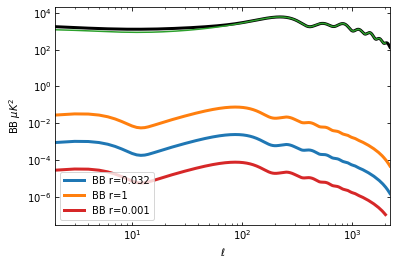

In [6]:
### input CMB power spectra generated by CAMB 
(ll, T, E, B) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_96896687_totcls.dat.txt', unpack=True, usecols=(0,1,2,3))
B_014 = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_34747700_totcls.dat.txt', unpack=True, usecols=(3))
B_032 = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_41507785_totcls.dat.txt', unpack=True, usecols=(3))
(ll_r, T_r, B_r) = np.loadtxt('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/camb_52566576_totcls.dat.txt', unpack=True, usecols=(0,1,3))
plt.loglog(ll, T, lw=3, color='black')
plt.loglog(ll, B_032, lw=3, label='BB r=0.032')
plt.loglog(ll, B, lw=3, label='BB r=1') # 0th: ell; 1st: TT; 2nd: EE; 3rd: BB
plt.loglog(ll_r, T_r)
plt.loglog(ll_r, B_r, lw=3, label='BB r=0.001')
plt.xlabel(r'$\ell$')
plt.ylabel(r'BB $\mu K^2$')
plt.xlim(2,2200)
plt.legend();


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

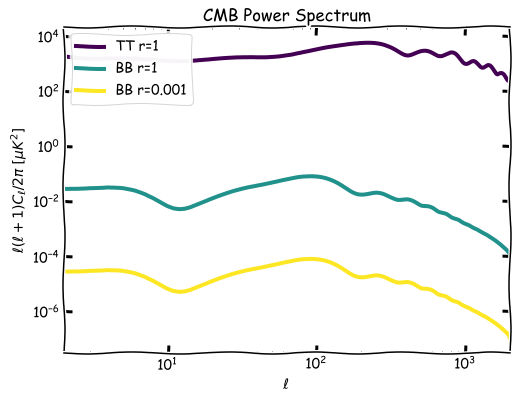

In [7]:
with plt.xkcd():
    cl = mcp.gen_color(cmap="viridis",n=3)
    fig = plt.figure(figsize=(8,6))
    plt.loglog(ll, T, lw=4, color=cl[0], label='TT r=1')
    plt.loglog(ll, B, lw=4, color=cl[1], label='BB r=1') # 0th: ell; 1st: TT; 2nd: EE; 3rd: BB
    plt.loglog(ll_r, B_r, lw=4, color=cl[2], label='BB r=0.001')
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$ $[\mu K^2]$')
    plt.xlim(2,2000)
    plt.title('CMB Power Spectrum')
    plt.legend(loc='upper left');

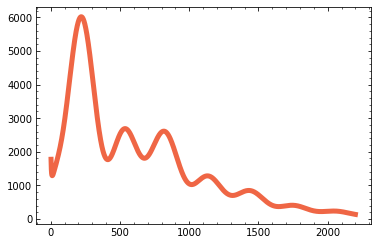

In [8]:
### pick colors...
#cl = mcp.gen_color(cmap="inferno",n=3)
cl = ['#ef6645', '#f88c51', '#fdb365']
plt.plot(ll, T, lw=5, color=cl[0])

# Calculate $\Delta r$ 

amp = 0.2
[ 51.01131973 102.02263946]
Error amplitude is 0.2, the corresponding leakage^2 is 0.00000
r= 0.00013727750412891477
RMS =  0.017320995144783677
average error is  2.3875314247476144e-07
amp = 0.45
[ 51.01131973 102.02263946]
Error amplitude is 0.45, the corresponding leakage^2 is 0.00000
r= 0.0033508660554789405
RMS =  0.03892432847128586
average error is  1.205701104540128e-06
amp = 2.7
[ 51.01131973 102.02263946]
Error amplitude is 2.7, the corresponding leakage^2 is 0.00013
r= 4.391607372234493
RMS =  0.23316955490364397
average error is  4.327056569719457e-05


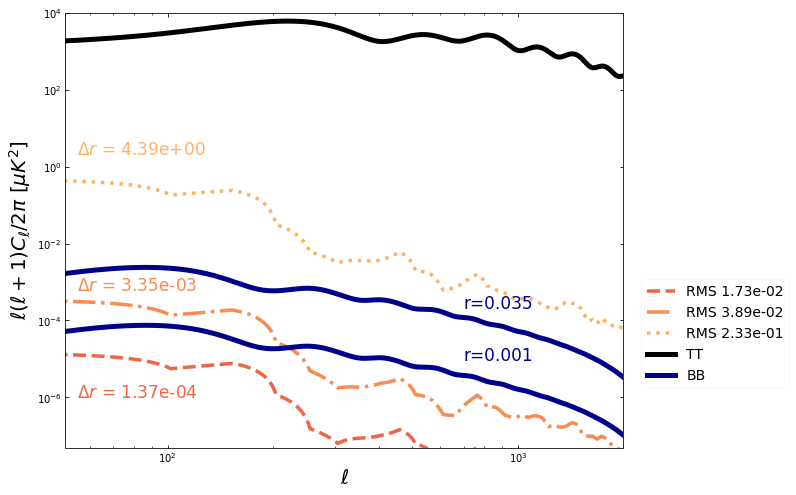

In [11]:

N_screen = 4096
N_theta = 1024
D = 10.0
sigma = 1.0
maxdeg = 5.0
trunc = 'y'
option = 'amp'
leak = []
#amp = np.array([0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2.0, 5.0])
amp = np.array([0.2, 0.45, 2.7])
#amp = np.array([0.1,1.0])
r = np.array([])
kin = 15
kout = 25
noise_norm = np.zeros_like(amp)
txt_leak = np.array([]) # 1D array containing all leakage spectrum, will be printed to a text file.
#cl = mcp.gen_color(cmap="magma",n=len(amp))
cl = ['#ef6645', '#f88c51', '#fdb365']
ls = ['--', '-.', ':']


# perfect gaussian create E screen [m]
screen = {}
screen['N'] = N_screen
screen['D'] = D
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, sigma)
if trunc=='y':
    InCircle(screen, center, 2.0)
ScreenFFT(screen)

# interpolation in sky intensity [rad] (unperturbed beam)
lam = 0.002 #mm wavelength
thetamaxdeg = maxdeg
thetamax = thetamaxdeg*np.pi/180. # in radians
theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam)   # unperturbed
fft_I0 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II0)))) # in ell space
theta_vec = np.linspace(0,2*thetamax,N_theta) #rad

#calculate ell
n = theta_vec.shape[0]
dl = 2*np.pi/theta_vec.max() # dl in 1/rad space
l_vec = np.fft.fftshift(dl * np.fft.fftfreq(n)*n)
(l_x, l_y) = np.meshgrid(l_vec,l_vec) # 1/rad 
l = np.sqrt(l_x**2 + l_y**2)

fig = plt.figure(figsize=(10,8))

# #cl_ = mcp.gen_color(cmap="viridis",n=3)
# plt.subplot(1,2,1)
# plt.loglog(ll, T, lw=4, color='black', label='TT')
# plt.loglog(ll, B, lw=4, color='darkblue', label='BB r=1') # 0th: ell; 1st: TT; 2nd: EE; 3rd: BB
# plt.loglog(ll_r, B_r, lw=4, color='blue', label='BB r=0.001')
# plt.xlabel(r'$\ell$')
# plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$ $[\mu K^2]$')
# plt.xlim(2,2000)
# plt.title('CMB Power Spectrum')
# plt.legend(loc='upper left')

# plt.subplot(1,2,2)
# plt.plot([], [], ' ', label="                       ")

for i in range(len(amp)):
    print('amp =', amp[i])
    
    # perturbed E screen
    screen1 = {}
    screen1['N'] = N_screen
    screen1['D'] = D
    Initialize(screen1)
    MultByGaussian(screen1, center, sigma)
    if trunc=='y':
        InCircle(screen1, center, 2.0)
    
    if option=='phase':
        emap_E = filter_annulus_phase(screen1, amp[i], kin, kout)
    elif option=='amp':
        emap_E = filter_annulus_amp(screen1, amp[i], kin, kout)
    else: print('Choose phase or amplitude errors')
    
    ScreenFFT(screen1)
    
    # interpolate the perturbed beam 
    theta_vec = np.linspace(-thetamax,thetamax,N_theta) 
    II1 = Project_I_on_thetagrid(theta_vec, screen1, lam) # perturbed
    #II1 = II1 * (np.sum(II0)/np.sum(II1))
    # shift the beam from being centered at theta=0 to theta=thetamax so that the beam spans from 0 deg to 2*thetamax deg
    theta_vec = np.linspace(0,2*thetamax,N_theta) #rad
    
    # FT of sky intensity
    I_diff = II1 - II0 # take the difference in theta space (sky)
    fft_Idiff = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(I_diff)))) # FFT the difference to ell space
    fft_I1 = np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(II1)))) # in ell space
    
    # average (FT of II0)^2 radially 
    bin_edges = np.linspace(0,l.max(),int(len(theta_vec)/2))
    l_flatten = l.flatten()
    fft_numerical0 = fft_I0.flatten()
    fft_numerical1 = fft_I1.flatten()
    fft_numerical_diff = fft_Idiff.flatten()
    bin_mean0, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical0, statistic='mean', bins=bin_edges) 
    bin_mean1, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical1, statistic='mean', bins=bin_edges) # bin_mean is the binned numerical beam
    bin_mean_diff, bin_edge, bin_num = binned_statistic(l_flatten, fft_numerical_diff, statistic='mean', bins=bin_edges) # bin the beam difference
    l_vec = bin_edges[0:-1] # ell 1D vector
    
    beam_diff_rela = bin_mean_diff/bin_mean0 # relative beam difference
    print(l_vec[1:3]) # making sure we average the leakage at ell=85 and ell=170
    leak = np.append(leak, np.mean(beam_diff_rela[1:3])) # average the beam difference at l=85 and l=170 (2nd and 3rd elements); not really used in later calculation
    txt_leak = np.append(txt_leak, beam_diff_rela**2) # leakage power spectrum stored in the 1D array leak_spec
    print('Error amplitude is {}, the corresponding leakage^2 is {:.5f}'.format(amp[i], leak[i]**2))
    
    
    ### plot the leakage spectrum and T->B power spectrum
    spline = interp.InterpolatedUnivariateSpline(l_vec, beam_diff_rela**2, k=1)
    leakage = spline(ll)
    #plt.loglog(ll,T*leakage, label='leakage {}'.format(amp[i])) 
    
    """calculate the bias in r"""
    #####!!! updated
    want = np.where((ll<250)&(ll>50))
    B0 = np.mean(B[want]) # BB power averaged over 50<l<250 with r=1
    B_leak = np.mean(T[want]*spline(ll[want]))
    r = np.append(r, 1 * (B_leak / B0)) # bias in r averaged over 50<l<250
    print('r=',r[i])
    
    """calculate normalized noise level"""
    #####!!! updated  
    emap_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(emap_E))) # scaled error map in fourier space
    norm_fft = np.abs(emap_fft**2)/screen1['dk']**2/screen1['N']**4 # V^2/Hz^2
    idx = np.where((screen1['kap']<kout) & (screen1['kap']>kin)) # inside the filter
    avg_fft = np.mean(norm_fft[idx]) # V^2/Hz^2
    total_Vf = np.sum(norm_fft)*screen1['dk']**2
    rms_sq = np.abs(rms(emap_E)**2)
    #print('V^2/Hz^2 = ',total_Vf)
    print('RMS = ', np.sqrt(rms_sq))
    noise_norm[i] = avg_fft
    print('average error is ', avg_fft)
    #print('sum of avg error is', avg_fft * np.pi*(kout**2-kin**2))
    
    """plot the leakage poewr spectrum with normalized noise labeled"""
    #plt.loglog(ll,T*leakage, label='Noise {:.2e}'.format(avg_fft), ls=ls[i], lw=3.5, color=cl[i]) 
    plt.loglog(ll, T*leakage, label='RMS {:.2e}'.format(np.sqrt(rms_sq)), ls=ls[i], lw=3.5, color=cl[i])

# plt.plot([], [], ' ', label="                       ")
# plt.plot([], [], ' ', label="                       ")
plt.loglog(ll, T, lw=5, label='TT', color='black')
plt.loglog(ll, B_032, lw=5, label='BB', color='darkblue') #r=0.032 current BICEP measurement
plt.loglog(ll_r, B_r, lw=5, color='darkblue') # r = 0.001, future CMB-S4
plt.xlabel(r'$\ell$', fontsize=20)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$ $[\mu K^2]$', fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 0.12),loc="lower left", fontsize = 14, framealpha=0.1)
plt.xlim(l_vec[1],2000)
# plt.text(2.8e3, 1e-1, 'T to P leakage spectrum:', fontsize=13.5)
# plt.text(2.8e3, 1.5e-5, 'CMB power spectrum:', fontsize=13.5)
plt.text(0.55e2, 2, r'$\Delta r$ = {:.2e}'.format(r[2]), color=cl[2], fontsize=17)
plt.text(0.55e2, 0.6e-3, r'$\Delta r$ = {:.2e}'.format(r[1]), color=cl[1], fontsize=17)
plt.text(0.55e2, 0.1e-5, r'$\Delta r$ = {:.2e}'.format(r[0]), color=cl[0], fontsize=17)

#plt.text(13.5, 0.3e-2, 'r=0.032', color='darkblue')
plt.text(0.7e3, 0.2e-3, 'r=0.035', color='darkblue', fontsize=17)
plt.text(0.7e3, 0.9e-5, 'r=0.001', color='darkblue', fontsize=17)
plt.ylim(0.5e-7, 1e4)

#plt.savefig('/Users/zhaoyuhuai/Desktop/SeniorProj/Thesis/Leakage_ps_h.png', bbox_inches='tight', dpi=600)
plt.show()


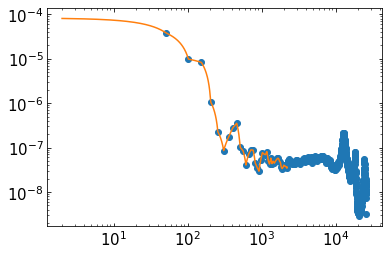

In [31]:
### test interpolation: order k=1 works the best
spline = interp.InterpolatedUnivariateSpline(l_vec, beam_diff_rela**2, k=1)
leakage = spline(ll)
plt.loglog(l_vec, beam_diff_rela**2, 'o')
plt.loglog(ll, spline(ll))

In [61]:
### write to a csv file
txt_amp = np.repeat(amp, len(beam_diff_rela)) # 0th column - noise amplitude
txt_noise = np.repeat(noise_norm, len(beam_diff_rela)) # 1st column - normalized noise level in k space
txt_ell = np.tile(l_vec, len(amp)) # 2nd column - ell vector
txt_r = np.repeat(r, len(beam_diff_rela)) # 3rd column - tensor to scalar ratio r
# 4th column - txt_leakage stored in the loop, already a 1D array
with open('/Users/zhaoyuhuai/Desktop/SeniorProj/Data/test_data_r.csv', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerows(zip(txt_amp, txt_noise, txt_ell, txt_r, txt_leak))

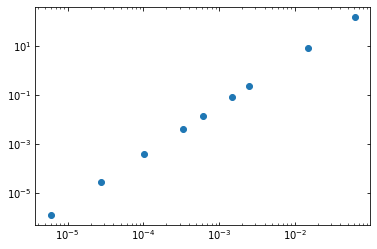

In [23]:
plt.loglog(leak, r,'o')

# 